# ML Assignment Codanics
Author : Muhammad Anas Khan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  datetime64[ns]
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

In [5]:
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58759 entries, 0 to 61886
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     58759 non-null  datetime64[ns]
 1   day                                                         58759 non-null  int64         
 2   month                                                       58759 non-null  int64         
 3   year                                                        58759 non-null  int64         
 4   cases                                                       58759 non-null  int64         
 5   deaths                                                      58759 non-null  int64         
 6   countriesAndTerritories                                     58759 non-null  object        
 7   geoId                      

In [6]:
df.drop(columns=['dateRep','day','month','year','geoId','countryterritoryCode','popData2019'],inplace=True)
df.head()

,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,746,6,Afghanistan,Asia,9.013779
1,298,9,Afghanistan,Asia,7.052776
2,113,11,Afghanistan,Asia,6.868768
3,63,10,Afghanistan,Asia,7.134266
4,202,16,Afghanistan,Asia,6.968658


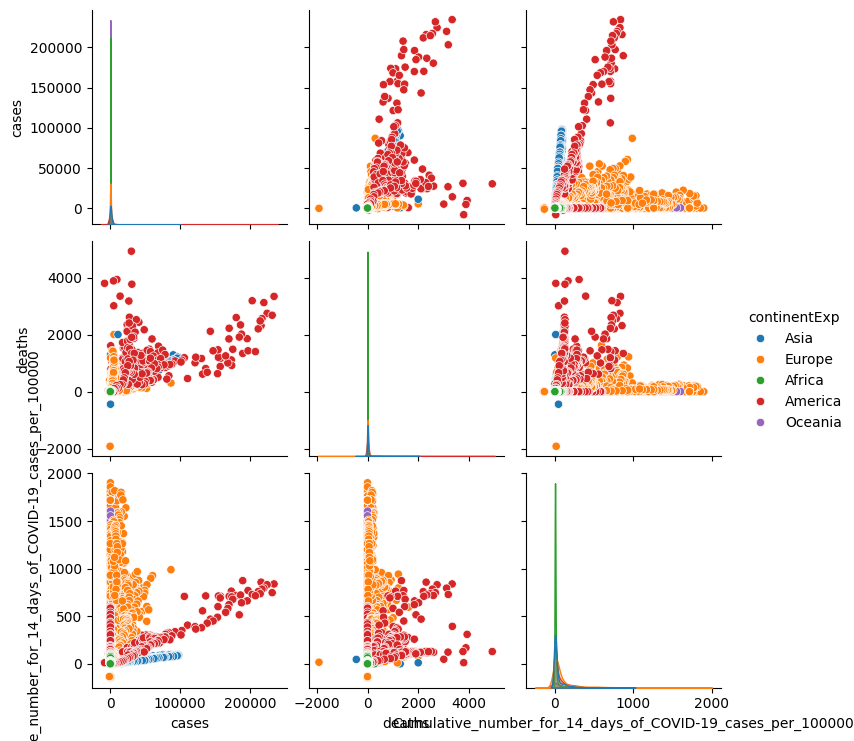

In [7]:
sns.pairplot(df,hue='continentExp')

Text(0.5, 1.0, 'Cases vs Deaths by Continent')

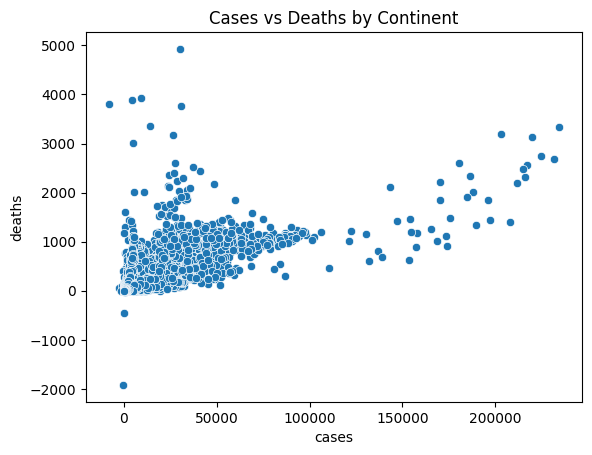

In [8]:
sns.scatterplot(x='cases', y='deaths', data=df)
plt.title("Cases vs Deaths by Continent")


In [9]:
df.rename(columns={'countriesAndTerritories': 'country','continentExp':'Continent','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':'fortnightly_cumulative_cases'},inplace = True)

df.head()

,cases,deaths,country,Continent,fortnightly_cumulative_cases
0,746,6,Afghanistan,Asia,9.013779
1,298,9,Afghanistan,Asia,7.052776
2,113,11,Afghanistan,Asia,6.868768
3,63,10,Afghanistan,Asia,7.134266
4,202,16,Afghanistan,Asia,6.968658


In [10]:
df = pd.get_dummies(df,columns=['country','Continent'])
df.head()

,cases,deaths,fortnightly_cumulative_cases,country_Afghanistan,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua_and_Barbuda,...,country_Vietnam,country_Western_Sahara,country_Yemen,country_Zambia,country_Zimbabwe,Continent_Africa,Continent_America,Continent_Asia,Continent_Europe,Continent_Oceania
0,746,6,9.013779,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,298,9,7.052776,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,113,11,6.868768,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,63,10,7.134266,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,202,16,6.968658,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [11]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


lm = Lasso()
X = df.drop(columns=['deaths'])
y = df['deaths']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

from math import sqrt


MSE = mean_squared_error(y_test,y_pred)
RMSE = sqrt(MSE)
R_SQUARE = r2_score(y_test,y_pred)
print("MSE is :",MSE)
print("RMSE is :",RMSE)
print("R_2 Score is :",R_SQUARE)

MSE is : 6621.139092956829
RMSE is : 81.37038216056767
R_2 Score is : 0.5613319756127015


In [12]:
df.describe()

,cases,deaths,fortnightly_cumulative_cases
count,58759.000000,58759.000000,58759.000000
mean,1216.417179,27.441890,66.470760
std,6952.740171,134.548086,162.657960
min,-8261.000000,-1918.000000,-147.419587
25%,0.000000,0.000000,0.762010
50%,20.000000,0.000000,6.698860
75%,312.000000,5.000000,52.618251
max,234633.000000,4928.000000,1900.836210


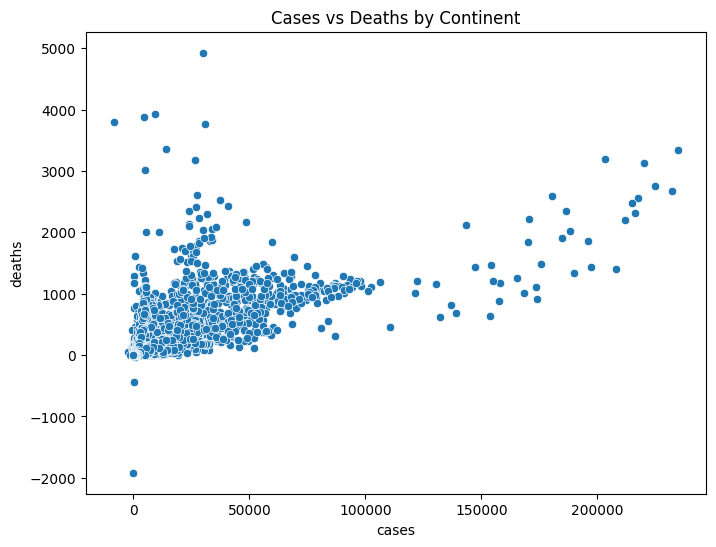

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='cases', y='deaths', data=df)
plt.title("Cases vs Deaths by Continent")
plt.show()


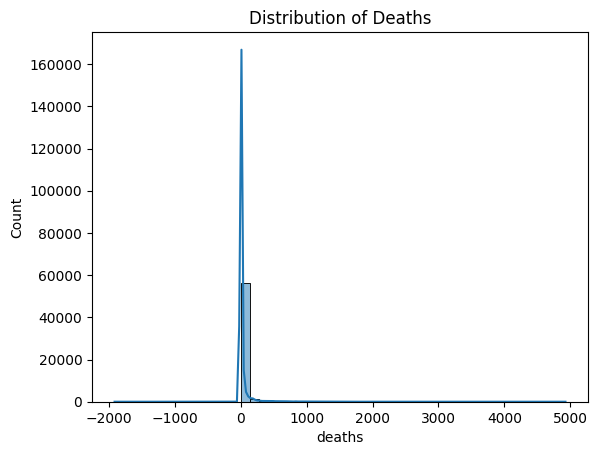

In [14]:
sns.histplot(df['deaths'], bins=50, kde=True)
plt.title("Distribution of Deaths")
plt.show()


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print("  MSE:", mean_squared_error(y_test, y_pred))
    print("  RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
    print("  R2 Score:", r2_score(y_test, y_pred))
    print("-"*40)


LinearRegression:
  MSE: 5627.389249022255
  RMSE: 75.01592663576352
  R2 Score: 0.6271705382306773
----------------------------------------
DecisionTree:
  MSE: 7236.306063275646
  RMSE: 85.06648025677121
  R2 Score: 0.5205755323860171
----------------------------------------
RandomForest:
  MSE: 3736.372918153944
  RMSE: 61.12587764731026
  R2 Score: 0.7524553851882836
----------------------------------------


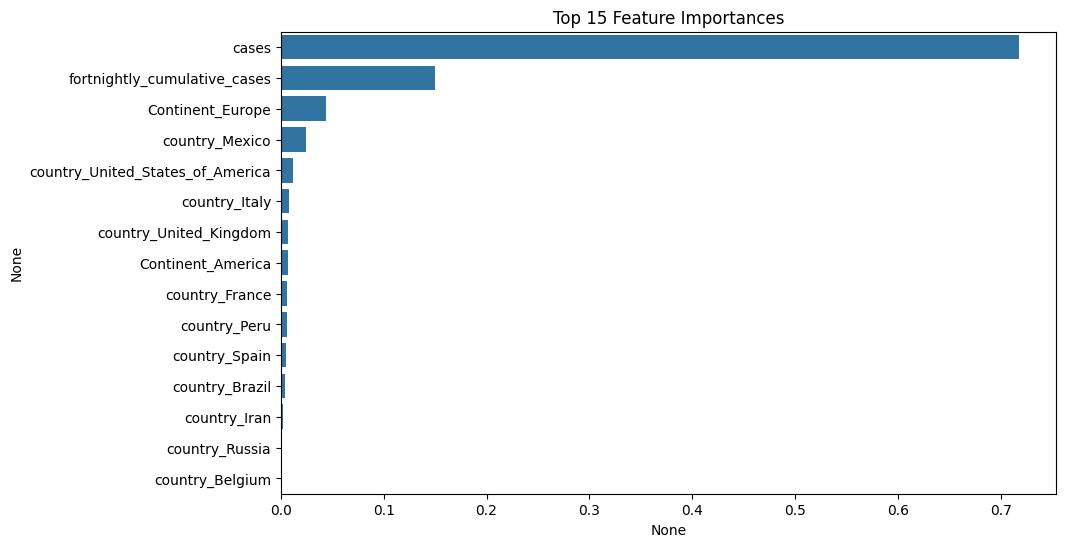

In [16]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)[:15]

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Top 15 Feature Importances")
plt.show()


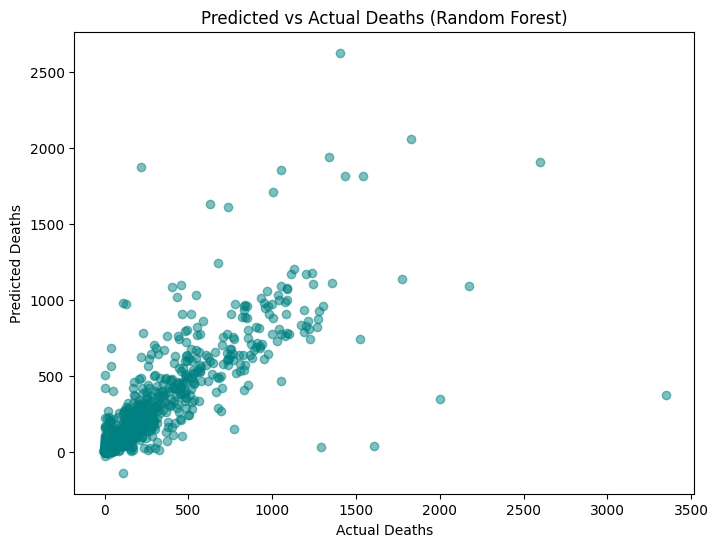

In [17]:
y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="teal")
plt.xlabel("Actual Deaths")
plt.ylabel("Predicted Deaths")
plt.title("Predicted vs Actual Deaths (Random Forest)")
plt.show()